In [2]:
# Load packages

%pip install pandas==1.4.1
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle 
from scipy.stats import poisson 

Note: you may need to restart the kernel to use updated packages.


In [3]:
# load raw data

dict_table = pickle.load(open('dict_table', 'rb'))
df_historical_data = pd.read_csv('clean_fifa_worldcup_matches.csv')
df_fixture = pd.read_csv('clean_fifa_worldcup_fixture.csv')

In [4]:
# Let's take a glimpse at the structure of dict_table by looking at Group A

dict_table['Group A']

,Pos,Team,Pld,W,D,L,GF,GA,GD,Pts
0,1,Qatar (H),0,0,0,0,0,0,0,0
1,2,Ecuador,0,0,0,0,0,0,0,0
2,3,Senegal,0,0,0,0,0,0,0,0
3,4,Netherlands,0,0,0,0,0,0,0,0


In [5]:
df_historical_data.sort_values("TotalGoals", ascending=False)

,HomeTeam,AwayTeam,Year,HomeGoals,AwayGoals,TotalGoals
78,Austria,Switzerland,1954,7,5,12
100,Hungary,West Germany,1954,8,3,11
343,Hungary,El Salvador,1982,10,1,11
46,Brazil,Poland,1938,6,5,11
135,France,Paraguay,1958,7,3,10
...,...,...,...,...,...,...
258,Sweden,Bulgaria,1974,0,0,0
590,France,Uruguay,2002,0,0,0
789,Netherlands,Costa Rica,2014,0,0,0
602,Spain,South Korea,2002,0,0,0


In [6]:
# Exploratory data analysis of historical WC data

total_home_goals = df_historical_data.groupby(["HomeTeam"])['HomeGoals'].sum()

total_away_goals = df_historical_data.groupby(["AwayTeam"])['AwayGoals'].sum()

total_home_goals

HomeTeam
Algeria           5
Angola            0
Argentina       111
Australia         7
Austria          32
               ... 
Uruguay          68
Wales             2
West Germany     95
Yugoslavia       41
Zaire             0
Name: HomeGoals, Length: 82, dtype: int64

In [7]:
total_away_goals

AwayTeam
Algeria          8
Angola           1
Argentina       26
Australia        6
Austria         11
                ..
Uruguay         19
Wales            2
West Germany    36
Yugoslavia      14
Zaire            0
Name: AwayGoals, Length: 85, dtype: int64

In [8]:
# Which country has scored the most goals in the WC?

total_goals = total_home_goals + total_away_goals

total_goals.sort_values(ascending = False)

Brazil                 229.0
Argentina              137.0
West Germany           131.0
Italy                  128.0
France                 120.0
                       ...  
Trinidad and Tobago      0.0
Zaire                    0.0
Dutch East Indies        NaN
El Salvador              NaN
Kuwait                   NaN
Length: 85, dtype: float64

In [9]:
# Mean no. of goals registered in a WC game

df_historical_data["TotalGoals"].mean()


2.831111111111111

<AxesSubplot:xlabel='Year', ylabel='TotalGoals'>

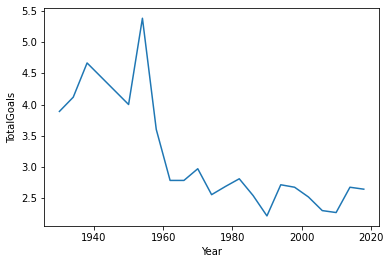

In [10]:
# Mean no. of goals registered in a WC game over time

avg_goals = pd.DataFrame(df_historical_data.groupby(["Year"])["TotalGoals"]
                         .mean())

avg_goals.reset_index(inplace=True)
avg_goals.columns

sns.lineplot(data=avg_goals, x="Year", y="TotalGoals")


In [11]:
# Compare distribution of avg.goals by country using a histogram

mean_home_goals = pd.DataFrame(df_historical_data
                               .groupby(["HomeTeam"])['HomeGoals']
                               .mean()
                               .sort_values(ascending = False)
                               .reset_index(level=0)
                               .rename(columns={"HomeTeam": "country"})
                              )

mean_home_goals

,country,HomeGoals
0,Turkey,5.000000
1,Hungary,4.055556
2,Russia,3.166667
3,Bosnia and Herzegovina,3.000000
4,Yugoslavia,2.733333
...,...,...
77,United Arab Emirates,0.000000
78,Togo,0.000000
79,Israel,0.000000
80,Angola,0.000000


In [12]:
mean_away_goals = pd.DataFrame(df_historical_data
                               .groupby(["AwayTeam"])['AwayGoals']
                               .mean()
                               .sort_values(ascending = False)
                               .reset_index(level=0)
                               .rename(columns={"AwayTeam": "country"})
                              )

mean_away_goals

,country,AwayGoals
0,Czech Republic,3.000000
1,Germany,2.076923
2,Brazil,1.968750
3,Netherlands,1.909091
4,Senegal,1.600000
...,...,...
80,Canada,0.000000
81,Iraq,0.000000
82,China,0.000000
83,Cuba,0.000000


In [13]:
mean_goals_df= pd.merge(mean_home_goals, mean_away_goals, on='country', how='right')

mean_goals_df["total_mean"] = mean_goals_df[["HomeGoals","AwayGoals"]].mean(axis=1)

mean_goals_df = mean_goals_df.sort_values(by=['total_mean'], ascending=False).reset_index()

mean_goals_df.index = mean_goals_df.index + 1

mean_goals_df.pop('index')

mean_goals_df.iloc[:30,:]

,country,HomeGoals,AwayGoals,total_mean
1,Turkey,5.000000,1.250000,3.125000
2,Hungary,4.055556,1.000000,2.527778
3,Brazil,2.155844,1.968750,2.062297
4,Germany,2.000000,2.076923,2.038462
5,West Germany,2.500000,1.500000,2.000000
6,Russia,3.166667,0.625000,1.895833
7,France,2.242424,1.393939,1.818182
8,Yugoslavia,2.733333,0.777778,1.755556
9,Bosnia and Herzegovina,3.000000,0.500000,1.750000
10,Netherlands,1.571429,1.909091,1.740260


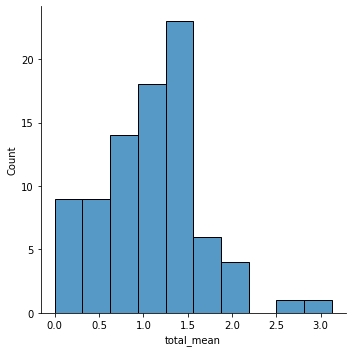

In [14]:
# Generate histogram to examine distribution around the mean

sns.displot(mean_goals_df, x="total_mean", bins=10)

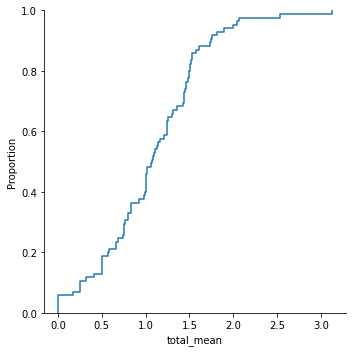

In [15]:
sns.displot(mean_goals_df, x="total_mean", kind="ecdf")

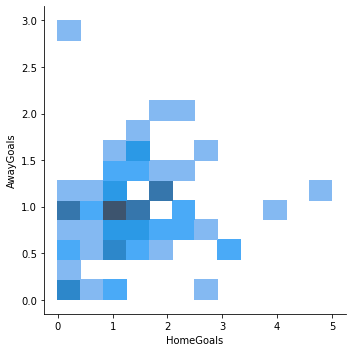

In [16]:
sns.displot(mean_goals_df, x="HomeGoals", y="AwayGoals")

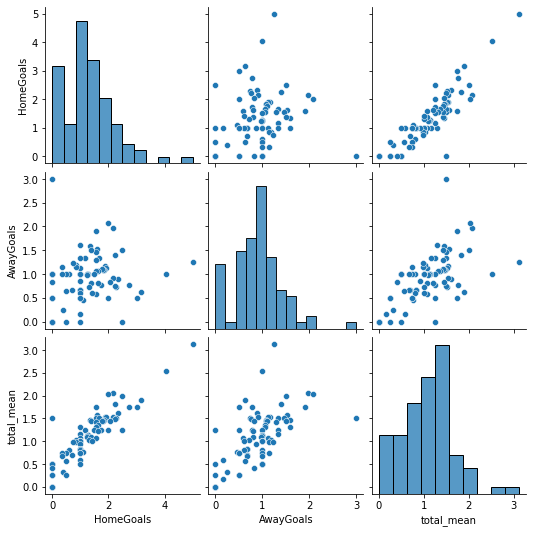

In [17]:
sns.pairplot(mean_goals_df)

In [18]:
# Calculate Team Strength 

df_home = df_historical_data[['HomeTeam', 'HomeGoals', 'AwayGoals']]
df_away = df_historical_data[['AwayTeam', 'HomeGoals', 'AwayGoals']]

In [19]:
#Rename columns

df_home = df_home.rename(columns={'HomeTeam': 'Team', 'HomeGoals': 'Goals scored', 'AwayGoals': 'Goals conceded'})
df_away = df_away.rename(columns={'AwayTeam': 'Team', 'HomeGoals': 'Goals conceded', 'AwayGoals': 'Goals scored'})

In [20]:
#concat df_home and df_away, group by and calculate mean

df_team_strength = pd.concat([df_home, df_away], ignore_index=True)\
.groupby('Team')\
.mean()

df_team_strength

,Goals scored,Goals conceded
Team,,
Algeria,1.000000,1.461538
Angola,0.333333,0.666667
Argentina,1.691358,1.148148
Australia,0.812500,1.937500
Austria,1.482759,1.620690
...,...,...
Uruguay,1.553571,1.321429
Wales,0.800000,0.800000
West Germany,2.112903,1.241935


In [21]:
# Now lets create a function which predicts how many points a team is going to get

In [22]:
def predict_points(h,a):
    
    if h in df_team_strength.index and a in df_team_strength.index: 
    
    # If the home or away team are found in the home and away dataframes
    
    # Calculate lambda for home and away team
    # Average goals scored * average goals conceded
    # This lambda formula basically rewards teams for scoring and penalises them for conceding
    
        lamb_h = df_team_strength.at[h, 'Goals scored'] * df_team_strength.at[a, 'Goals conceded']
        lamb_a = df_team_strength.at[a, 'Goals scored'] * df_team_strength.at[h, 'Goals conceded']
    
    # Probability starts at 0
    
        prob_h, prob_a, prob_d = 0, 0, 0
    
    # In essence, the following for loops are the simulation of the match
    
        for x in range(0,11): #no. of goals for home team (a match can only have b/w 0-10 goals)
            for y in range(0,11): #no of goals for away team
                
                #p represents the probability of goals happening for the home/away team
                
                p = poisson.pmf(x, lamb_h) * poisson.pmf(y, lamb_a)
                
                # Three possible scenarios
                
                # A draw (e.g. 1-1) increases the probability (p) of a team scoring 1 point in the future
                
                if x == y:
                    prob_d += p
                # A home win
                elif x > y:
                    prob_h += p
                # An away win
                else: 
                    prob_a += p
                    
        # This formula means that if prob_h is 100% then this means that probability of a draw is 0% hence we have 3 points.
        # On t he flipside, if prob_d is 100% then we will only have 1 point.
        
        points_h = 3 * prob_h + prob_d
        points_a = 3 * prob_a + prob_d
        return (points_h, points_a) # Creates a tuple
    else:
        return (0,0) # If false, tuple with values of 0 and 0 are returned


In [23]:
#Test with matches Argentina-Mexico, England-Wales, and Qatar-Ecuador

predict_points('Argentina', 'Mexico')


(2.3129151525530505, 0.5378377125059863)

In [24]:
predict_points('England', 'Wales')

(1.593887353091192, 1.0828229517246504)

In [25]:
# As there is no historical data for Qatar, null values are returned
# Qatar is not found in the df_team_strength dataframe so the return 0 values line of code is triggered.

predict_points('Qatar', 'Ecuador')

(0, 0)

In [26]:
# Predicting the current World Cup
# Splitting fixture into group, knockout, quarter....

df_fixt_grp = df_fixture[:48].copy()
df_fixt_ko = df_fixture[48:56].copy()
df_fixt_quart = df_fixture[56:60].copy()
df_fixt_semi = df_fixture[60:62].copy()
df_fixt_final = df_fixture[62:].copy()

In [27]:
dict_table.keys()
dict_table.values()

dict_values([   Pos         Team  Pld  W  D  L  GF  GA  GD  Pts
0    1    Qatar (H)    0  0  0  0   0   0   0    0
1    2      Ecuador    0  0  0  0   0   0   0    0
2    3      Senegal    0  0  0  0   0   0   0    0
3    4  Netherlands    0  0  0  0   0   0   0    0,    Pos           Team  Pld  W  D  L  GF  GA  GD  Pts
0    1        England    0  0  0  0   0   0   0    0
1    2           Iran    0  0  0  0   0   0   0    0
2    3  United States    0  0  0  0   0   0   0    0
3    4          Wales    0  0  0  0   0   0   0    0,    Pos          Team  Pld  W  D  L  GF  GA  GD  Pts
0    1     Argentina    0  0  0  0   0   0   0    0
1    2  Saudi Arabia    0  0  0  0   0   0   0    0
2    3        Mexico    0  0  0  0   0   0   0    0
3    4        Poland    0  0  0  0   0   0   0    0,    Pos       Team  Pld  W  D  L  GF  GA  GD  Pts
0    1     France    0  0  0  0   0   0   0    0
1    2  Australia    0  0  0  0   0   0   0    0
2    3    Denmark    0  0  0  0   0   0   0    0
3    4  

In [28]:
dict_table['Group A']

,Pos,Team,Pld,W,D,L,GF,GA,GD,Pts
0,1,Qatar (H),0,0,0,0,0,0,0,0
1,2,Ecuador,0,0,0,0,0,0,0,0
2,3,Senegal,0,0,0,0,0,0,0,0
3,4,Netherlands,0,0,0,0,0,0,0,0


In [29]:
# run all the matches in the group stage and update group tables

for group in dict_table:
    teams_in_groups = dict_table[group]['Team'].values
    df_fixture_group_6 = df_fixt_grp[df_fixt_grp['home'].isin(teams_in_groups)] # This object represents the 6 matches that each group must play
    for index, row in df_fixture_group_6.iterrows():
        home, away = row['home'], row['away']
        points_home, points_away = predict_points(home, away)
        dict_table[group].loc[dict_table[group]['Team']==home, 'Pts'] += points_home
        dict_table[group].loc[dict_table[group]['Team']==away, 'Pts'] += points_away
    
    dict_table[group] = dict_table[group].sort_values('Pts', ascending=False).reset_index()
    dict_table[group] = dict_table[group][['Team', 'Pts']]  
    dict_table[group] = dict_table[group].round(0)

In [30]:
dict_table['Group H']

,Team,Pts
0,Portugal,6.0
1,Uruguay,5.0
2,Ghana,4.0
3,South Korea,2.0


In [31]:
# glimpse of df_fixt_ko

df_fixt_ko

,home,score,away,year
48,Winners Group A,Match 49,Runners-up Group B,2022
49,Winners Group C,Match 50,Runners-up Group D,2022
50,Winners Group D,Match 52,Runners-up Group C,2022
51,Winners Group B,Match 51,Runners-up Group A,2022
52,Winners Group E,Match 53,Runners-up Group F,2022
53,Winners Group G,Match 54,Runners-up Group H,2022
54,Winners Group F,Match 55,Runners-up Group E,2022
55,Winners Group H,Match 56,Runners-up Group G,2022


In [32]:
# Update the ko fixture with group winner and runner up

for group in dict_table:
    group_winner = dict_table[group].loc[0, 'Team'] # 0 is index row number and 'Team' is column name
    runners_up = dict_table[group].loc[1, 'Team']
    
    df_fixt_ko.replace({f'Winners {group}': group_winner,
                       f'Runners-up {group}': runners_up}, inplace=True)
    
    df_fixt_ko['winner'] = '?'
    

In [33]:
df_fixt_ko

,home,score,away,year,winner
48,Netherlands,Match 49,Wales,2022,?
49,Argentina,Match 50,Denmark,2022,?
50,France,Match 52,Poland,2022,?
51,England,Match 51,Senegal,2022,?
52,Germany,Match 53,Belgium,2022,?
53,Brazil,Match 54,Uruguay,2022,?
54,Croatia,Match 55,Spain,2022,?
55,Portugal,Match 56,Switzerland,2022,?


In [34]:
# Create a get_winner function

def get_winner(df_fixt_updated):
    for index, row in df_fixt_updated.iterrows():
        home, away = row['home'], row['away']
        points_home, points_away = predict_points(home, away)
        if points_home > points_away:
            winner = home
        else: 
            winner = away
        df_fixt_updated.loc[index, 'winner'] = winner
    return df_fixt_updated

In [35]:
get_winner(df_fixt_ko)

,home,score,away,year,winner
48,Netherlands,Match 49,Wales,2022,Netherlands
49,Argentina,Match 50,Denmark,2022,Argentina
50,France,Match 52,Poland,2022,France
51,England,Match 51,Senegal,2022,England
52,Germany,Match 53,Belgium,2022,Germany
53,Brazil,Match 54,Uruguay,2022,Brazil
54,Croatia,Match 55,Spain,2022,Spain
55,Portugal,Match 56,Switzerland,2022,Portugal


In [36]:
df_fixt_quart

,home,score,away,year
56,Winners Match 53,Match 58,Winners Match 54,2022
57,Winners Match 49,Match 57,Winners Match 50,2022
58,Winners Match 55,Match 60,Winners Match 56,2022
59,Winners Match 51,Match 59,Winners Match 52,2022


In [37]:
#Create update table function which updates a table based on previous data

def update_table(df_fixt_round_1, df_fixt_round_2):   #first argument is ko-stages, second argument is QF, and so on.
    for index, row in df_fixt_round_1.iterrows():
        winner = df_fixt_round_1.loc[index, 'winner']
        match = df_fixt_round_1.loc[index, 'score']
        df_fixt_round_2.replace({f'Winners {match}':winner}, inplace =True)
    df_fixt_round_2['winner'] = '?'
    return df_fixt_round_2

In [38]:
update_table(df_fixt_ko, df_fixt_quart)

,home,score,away,year,winner
56,Germany,Match 58,Brazil,2022,?
57,Netherlands,Match 57,Argentina,2022,?
58,Spain,Match 60,Portugal,2022,?
59,England,Match 59,France,2022,?


In [39]:
get_winner(df_fixt_quart)

,home,score,away,year,winner
56,Germany,Match 58,Brazil,2022,Brazil
57,Netherlands,Match 57,Argentina,2022,Netherlands
58,Spain,Match 60,Portugal,2022,Portugal
59,England,Match 59,France,2022,France


In [40]:
update_table(df_fixt_quart, df_fixt_semi)

,home,score,away,year,winner
60,Netherlands,Match 61,Brazil,2022,?
61,France,Match 62,Portugal,2022,?


In [41]:
get_winner(df_fixt_semi)

,home,score,away,year,winner
60,Netherlands,Match 61,Brazil,2022,Brazil
61,France,Match 62,Portugal,2022,France


In [42]:
update_table(df_fixt_semi, df_fixt_final)

,home,score,away,year,winner
62,Losers Match 61,Match 63,Losers Match 62,2022,?
63,Brazil,Match 64,France,2022,?


In [43]:
get_winner(df_fixt_final)

,home,score,away,year,winner
62,Losers Match 61,Match 63,Losers Match 62,2022,Losers Match 62
63,Brazil,Match 64,France,2022,Brazil


In [ ]:
# Brazil is predicted to win the World Cup!

In [ ]:
# N.B. I am indebted to Frank Andrade whose very helpful YouTube tutorial helped me a lot for this project.
#I build on the code written by Frank Andrade and apply the bespoke functions created by him. 

# https://www.youtube.com/watch?v=anEoBZkZRHA&t=184s 
# https://towardsdatascience.com/predicting-the-fifa-world-cup-2022-with-a-simple-model-using-python-6b34bdd4f2a5

#Other useful links:
#https://seaborn.pydata.org/tutorial/distributions.html 